In [33]:
import pandas as pd
import glob
import numpy as np

a2CFileNames = f'./csvLogs/A2CCounterTimeUser2_seed*.csv'
a2cFiles = glob.glob(a2CFileNames)
a2cdf = {}
x1 = []

for i, file in enumerate(a2cFiles):
    a2c = pd.read_csv(file)
    
    # Filter the DataFrame where 'Total Packets' is greater than 500
    filtered_a2c = a2c[a2c['Total Packets'] > 500]
    
    # Store the filtered DataFrame in the dictionary
    a2cdf[f'a2c_{i+1}'] = filtered_a2c
    
    # Append the filtered data to the list
    x1.append(filtered_a2c[['Episode', 'Total Packets', 'Total Rewards', '%Success', 'Time']].values)

# Display the filtered DataFrames
# for key, value in a2cdf.items():
#     print(f'{key}:')
#     print(value.head())

# If you want to combine all arrays into one, you can concatenate them
# x = np.concatenate(x1, axis=0)

print(x1[0].shape, x1[1].shape)


(82, 5) (88, 5)


/tmp/ipykernel_55465/2550252127.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_a2c['Seed'] = i
/tmp/ipykernel_55465/2550252127.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_a2c['Seed'] = i
/tmp/ipykernel_55465/2550252127.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

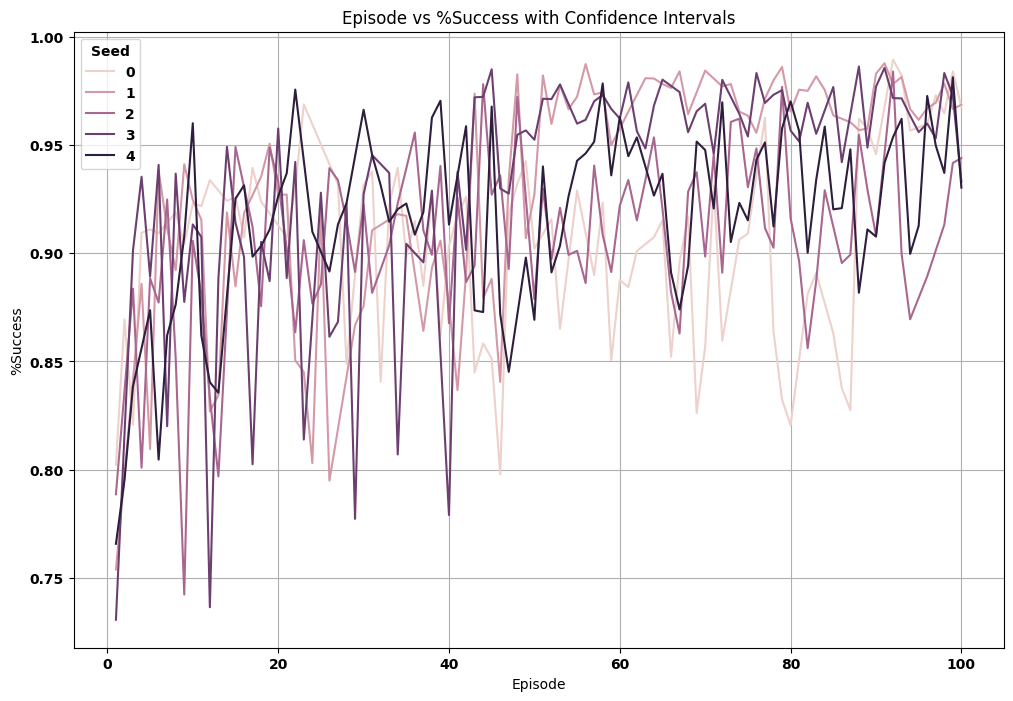

In [34]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pattern to match the CSV files
a2CFileNames = './csvLogs/A2CCounterTimeUser2_seed*.csv'
a2cFiles = glob.glob(a2CFileNames)

# List to store filtered DataFrames
combined_data = []

# Read and filter the CSV files
for i, file in enumerate(a2cFiles):
    a2c = pd.read_csv(file)
    
    # Filter the DataFrame where 'Total Packets' is greater than 500
    filtered_a2c = a2c[a2c['Total Packets'] > 500]
    
    # Add a column to identify the seed
    filtered_a2c['Seed'] = i
    
    # Append the filtered DataFrame to the list
    combined_data.append(filtered_a2c[['Episode', 'Total Packets', 'Total Rewards', '%Success', 'Time', 'Seed']])

# Concatenate all filtered DataFrames into a single DataFrame
combined_df = pd.concat(combined_data, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot the mean with confidence intervals
sns.lineplot(data=combined_df, x='Episode', y='%Success', hue='Seed', ci='sd', estimator='mean')

plt.xlabel('Episode')
plt.ylabel('%Success')
plt.title('Episode vs %Success with Confidence Intervals')
plt.legend(title='Seed')
plt.grid(True)
plt.show()


/tmp/ipykernel_55465/4264727664.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_a2c['Seed'] = i + 1
/tmp/ipykernel_55465/4264727664.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_a2c['Seed'] = i + 1
/tmp/ipykernel_55465/4264727664.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

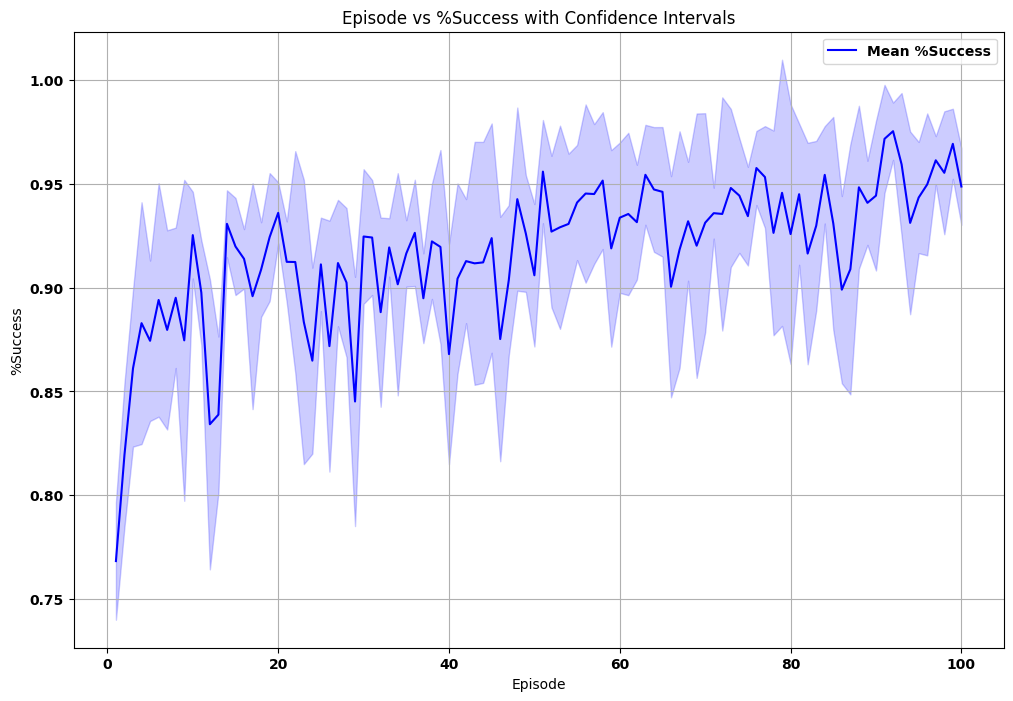

In [35]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

# Define the pattern to match the CSV files
ca2cFileNames = './csvLogs/A2CCounterTimeUser2_seed*.csv'
cppoFileNames = './csvLogs/PPOCounterTimeUser2_seed*.csv'
a2cFileNames = './csvLogs/A2Cuser2_seed*.csv'
ppoFileNames = './csvLogs/PPOuser2_seed*.csv'
dqnFileNames = './csvLogs/DQNuser2_seed*.csv'
a2cFiles = glob.glob(a2CFileNames)

# List to store filtered DataFrames
combined_data = []

# Read and filter the CSV files
for i, file in enumerate(a2cFiles):
    a2c = pd.read_csv(file)
    
    # Filter the DataFrame where 'Total Packets' is greater than 500
    filtered_a2c = a2c[a2c['Total Packets'] > 500]
    
    # Add a column to identify the seed
    filtered_a2c['Seed'] = i + 1
    
    # Append the filtered DataFrame to the list
    combined_data.append(filtered_a2c[['Episode', 'Total Packets', 'Total Rewards', '%Success', 'Time', 'Seed']])

# Concatenate all filtered DataFrames into a single DataFrame
combined_df = pd.concat(combined_data, ignore_index=True)

# Calculate mean and standard deviation
mean_df = combined_df.groupby('Episode')['%Success'].mean().reset_index()
std_df = combined_df.groupby('Episode')['%Success'].std().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plot mean %Success
plt.plot(mean_df['Episode'], mean_df['%Success'], label='Mean %Success', color='b')

# Plot confidence interval
plt.fill_between(mean_df['Episode'], mean_df['%Success'] - std_df['%Success'], mean_df['%Success'] + std_df['%Success'], color='b', alpha=0.2)

plt.xlabel('Episode')
plt.ylabel('%Success')
plt.title('Episode vs %Success with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


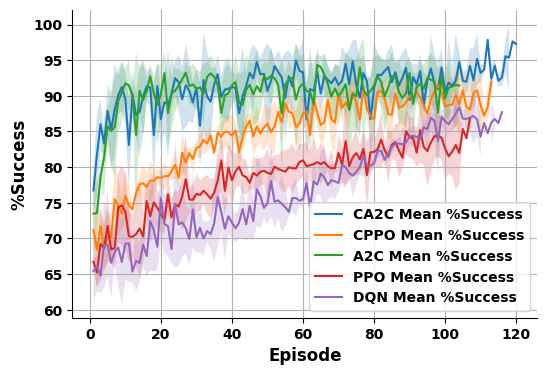

In [36]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.weight'] = 'bold'

# Define the patterns to match the CSV files
file_patterns = {
    'CA2C': './csvLogs/CA2C_0.5_0.5_2_seed*.csv',
    'CPPO': './csvLogs/CPPO_0.5_0.5_2_seed*.csv',
    'A2C': './csvLogs/A2Cuser2_seed*.csv',
    'PPO': './csvLogs/PPOuser2_seed*.csv',
    'DQN': './csvLogs/DQNuser2_seed*.csv'
}

# Dictionary to store combined DataFrames for each method
combined_data = {}

# Read, filter, and store the data
for label, pattern in file_patterns.items():
    files = glob.glob(pattern)
    method_data = []
    
    for i, file in enumerate(files):
        df = pd.read_csv(file)
        
        # Filter the DataFrame where 'Total Packets' is greater than 500 and select the first 100 episodes
        filtered_df = df[df['Total Packets'] > 500].iloc[0:100]
        
        # Add a column to identify the seed
        filtered_df['Seed'] = i + 1
        filtered_df['%Success']*=100
        # Append the filtered DataFrame to the list
        method_data.append(filtered_df[['Episode', 'Total Packets', 'Total Rewards', '%Success', 'Time', 'Seed']])
    
    # Concatenate all filtered DataFrames for the current method into a single DataFrame
    combined_data[label] = pd.concat(method_data, ignore_index=True)

# Plotting
plt.figure(figsize=(6, 4))

for label, data in combined_data.items():
    # Calculate mean and standard deviation for the first 100 episodes
    mean_df = data.groupby('Episode')['%Success'].mean().reset_index()
    std_df = data.groupby('Episode')['%Success'].std().reset_index()
    
    # Plot mean %Success
    plt.plot(mean_df['Episode'], mean_df['%Success'], label=f'{label} Mean %Success')
    
    # Plot confidence interval
    plt.fill_between(mean_df['Episode'], mean_df['%Success'] - std_df['%Success'], mean_df['%Success'] + std_df['%Success'], alpha=0.2)

plt.xlabel('Episode', fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'bold'})
plt.ylabel('%Success',fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'bold'})
# plt.title('Episode vs %Success with Confidence Intervals for Various Methods')
plt.legend(loc = "lower right")
plt.grid(True)
plt.gca().spines[["right","top"]].set_visible(False)
plt.savefig('./plots/comparison_suceess.svg',format='svg',dpi=1200)
plt.show()
import cairosvg
cairosvg.svg2eps(url='./plots/comparison_suceess.svg', write_to='./plots/comparison_suceess_400.eps')

No data for CA2C in file ./csvLogs/CA2C_0.5_0.5_2_seed0.csv
No data for CA2C in file ./csvLogs/CA2C_0.5_0.5_2_seed4.csv
No data for CA2C in file ./csvLogs/CA2C_0.5_0.5_2_seed3.csv
No data for CPPO in file ./csvLogs/CPPO_0.5_0.5_2_seed3.csv
No data for CPPO in file ./csvLogs/CPPO_0.5_0.5_2_seed0.csv
No data for CPPO in file ./csvLogs/CPPO_0.5_0.5_2_seed4.csv


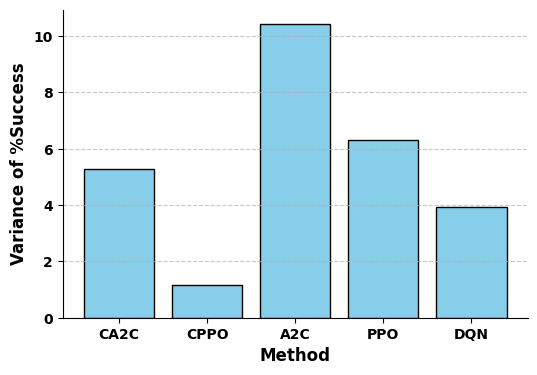

In [37]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cairosvg

rcParams['font.weight'] = 'bold'

# Define the patterns to match the CSV files
file_patterns = {
    'CA2C': './csvLogs/CA2C_0.5_0.5_2_seed*.csv',
    'CPPO': './csvLogs/CPPO_0.5_0.5_2_seed*.csv',
    'A2C': './csvLogs/A2Cuser2_seed*.csv',
    'PPO': './csvLogs/PPOuser2_seed*.csv',
    'DQN': './csvLogs/DQNuser2_seed*.csv'
}

# Dictionary to store variances and deviation ranges
variance_data = {}

# Read, filter, and process the data
for label, pattern in file_patterns.items():
    files = glob.glob(pattern)
    variances = []
    variances_per_seed = []
    
    for file in files:
        df = pd.read_csv(file)
        
        # Filter the DataFrame where 'Total Packets' is greater than 500 and select the last 20 episodes
        if label == 'CA2C' or label == 'CPPO':
            filtered_df = df[df['Total Packets'] > 800].iloc[300:400]
        else:
            filtered_df = df[df['Total Packets'] > 800].iloc[300:400]
        
        # Check if the filtered DataFrame is empty or has insufficient data points
        if filtered_df.shape[0] == 0:
            print(f"No data for {label} in file {file}")
            continue

        # Drop rows with missing values in '%Success'
        filtered_df = filtered_df.dropna(subset=['%Success'])
        filtered_df['%Success']*=100
        # Check again if the filtered DataFrame is empty after dropping NaNs
        if filtered_df.shape[0] == 0:
            print(f"No valid data for {label} in file {file} after dropping NaNs")
            continue
        
        # Add variance to the list
        variance = filtered_df['%Success'].var()
        
        # Check if the variance is NaN
        if np.isnan(variance):
            print(f"Variance calculation returned NaN for {label} in file {file}")
            continue
        
        variances.append(variance)
        
        # Store variance values for deviation calculation
        variances_per_seed.append(filtered_df['%Success'].values)
    
    if len(variances) == 0:
        print(f"No valid variances calculated for {label}")
        continue

    # Calculate mean variance and max/min deviations
    mean_variance = np.mean(variances)
    all_variances = np.concatenate(variances_per_seed)
    max_deviation = np.max(all_variances) - mean_variance
    min_deviation = mean_variance - np.min(all_variances)
    
    variance_data[label] = (mean_variance, min_deviation, max_deviation)

# Plotting
plt.figure(figsize=(6, 4))
methods = list(variance_data.keys())
mean_variances = [variance_data[m][0] for m in methods]
min_deviations = [variance_data[m][1] for m in methods]
max_deviations = [variance_data[m][2] for m in methods]

# Create bar graph with error bars
bars = plt.bar(methods, mean_variances, color='skyblue', edgecolor='black', capsize=5)

plt.xlabel('Method', fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'bold'})
plt.ylabel('Variance of %Success', fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'bold'})
# plt.title('Variance of %Success with Deviation Ranges for Different Methods')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[["right", "top"]].set_visible(False)

# Save the plot
plt.savefig('./plots/comparison_variances.svg', format='svg', dpi=1200)
plt.show()

# Convert SVG to EPS
cairosvg.svg2eps(url='./plots/comparison_variances.svg', write_to='./plots/comparison_variances.eps')


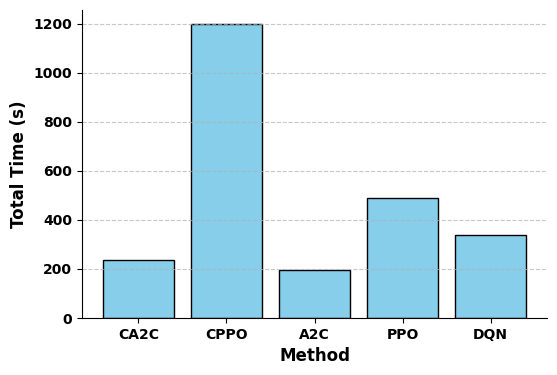

In [38]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cairosvg

rcParams['font.weight'] = 'bold'

# Define the patterns to match the CSV files
file_patterns = {
    'CA2C': './csvLogs/CA2C_0.5_0.5_2_seed*.csv',
    'CPPO': './csvLogs/CPPO_0.5_0.5_2_seed*.csv',
    'A2C': './csvLogs/A2Cuser2_seed*.csv',
    'PPO': './csvLogs/PPOuser2_seed*.csv',
    'DQN': './csvLogs/DQNuser2_seed*.csv'
}

# Dictionary to store total training times
total_times = {}

# Read, filter, and process the data
for label, pattern in file_patterns.items():
    files = glob.glob(pattern)
    total_time = 0
    episode_count = 50 if label in ['CA2C', 'A2C'] else 150
    
    for file in files:
        df = pd.read_csv(file)
        
        # Filter the DataFrame where 'Total Packets' is greater than 500 and select the last 20 episodes
        filtered_df = df.iloc[:episode_count]
        
        # Check if the filtered DataFrame is empty or has insufficient data points
        if filtered_df.shape[0] == 0:
            print(f"No data for {label} in file {file}")
            continue

        # Drop rows with missing values in 'Time'
        filtered_df = filtered_df.dropna(subset=['Time'])

        # Check again if the filtered DataFrame is empty after dropping NaNs
        if filtered_df.shape[0] == 0:
            print(f"No valid data for {label} in file {file} after dropping NaNs")
            continue
        
        # Sum the 'Time' column
        total_time += filtered_df['Time'].sum()
    
    total_times[label] = total_time

# Plotting
plt.figure(figsize=(6, 4))
methods = list(total_times.keys())
times = [total_times[m] for m in methods]

# Create bar graph with error bars
bars = plt.bar(methods, times, color='skyblue', edgecolor='black', capsize=5)

plt.xlabel('Method', fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'bold'})
plt.ylabel('Total Time (s)', fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'bold'})
# plt.title('Total Training Time for Different Methods')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[["right", "top"]].set_visible(False)

# Save the plot
plt.savefig('./plots/comparison_training_times.svg', format='svg', dpi=1200)
plt.show()

# Convert SVG to EPS
cairosvg.svg2eps(url='./plots/comparison_training_times.svg', write_to='./plots/comparison_training_times.eps')


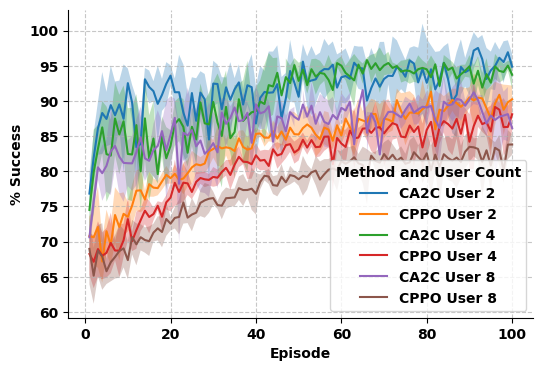

In [39]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the patterns to match the CSV files for different user counts
user_counts = [2, 4, 8]
methods = ['A2C', 'PPO']
file_patterns = {
    user_count: {method: f'./csvLogs/{method}CounterTimeUser{user_count}_seed*.csv' for method in methods}
    for user_count in user_counts
}

# Initialize a dictionary to store data
data = {user_count: {method: [] for method in methods} for user_count in user_counts}

# Read, filter, and process the data
for user_count in user_counts:
    for method in methods:
        files = glob.glob(file_patterns[user_count][method])
        
        for file in files:
            df = pd.read_csv(file)
            # Filter the DataFrame where 'Total Packets' is greater than 500
            filtered_df = df[df['Total Packets'] > 500]
            
            # Store the filtered data
            data[user_count][method].append(filtered_df[['Episode', '%Success']])

# Plotting
plt.figure(figsize=(6, 4))

for user_count in user_counts:
    for method in methods:
        # Concatenate dataframes for different seeds
        concatenated_df = pd.concat(data[user_count][method])
        
        # Group by Episode and calculate mean and std for %Success
        grouped = concatenated_df.groupby('Episode')['%Success'].agg(['mean', 'std']).reset_index()
        mean_success = grouped['mean']
        std_success = grouped['std']
        episodes = grouped['Episode']
        
        # Plot the mean % success with confidence intervals
        plt.plot(episodes, mean_success * 100, label=f'C{method} User {user_count}')
        plt.fill_between(episodes, (mean_success - std_success) * 100, (mean_success + std_success) * 100, alpha=0.3)

plt.xlabel('Episode', weight='bold')
plt.ylabel('% Success', weight='bold')
# plt.title('Training Performance with Increasing User Numbers', weight='bold')
plt.legend(title='Method and User Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines[["right", "top"]].set_visible(False)

# Save the plot
plt.savefig('./plots/training_performance_users.svg', format='svg', dpi=1200)
plt.show()

# Convert SVG to EPS
import cairosvg
cairosvg.svg2eps(url='./plots/training_performance_users.svg', write_to='./plots/training_performance_users.eps')


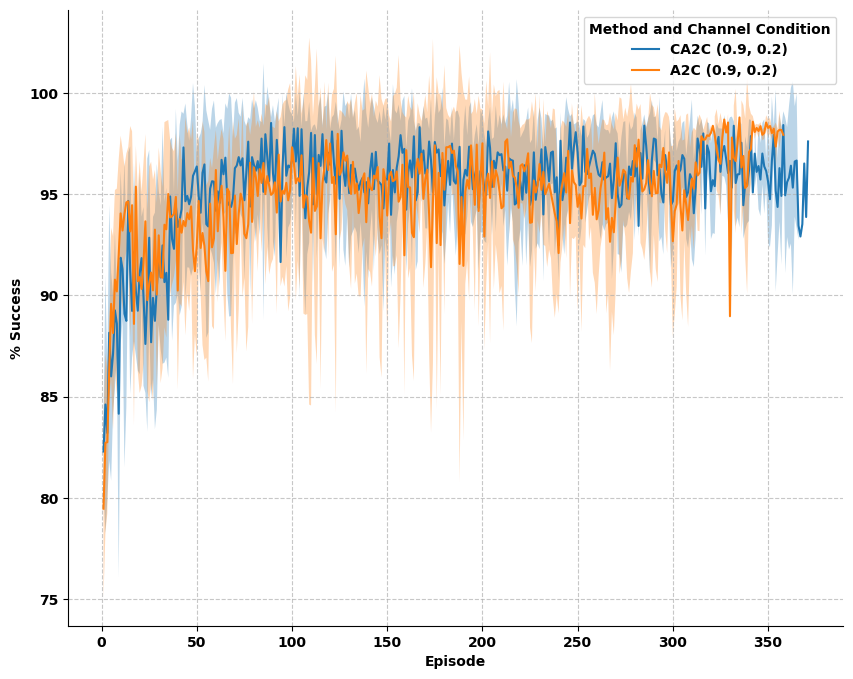

In [55]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['font.weight'] = 'bold'
# Define the patterns to match the CSV files for different channel conditions
# channel_conditions = [(0.2, 0.9), (0.5, 0.5), (0.9, 0.2)]
channel_conditions = [(0.9,0.2)]
methods = ['CA2C','A2C']
file_patterns = {
    condition: {method: f'./csvLogs/{method}_{condition[0]}_{condition[1]}_2_seed*.csv' for method in methods}
    for condition in channel_conditions
}

# Initialize a dictionary to store data
data = {condition: {method: [] for method in methods} for condition in channel_conditions}

# Read, filter, and process the data
for condition in channel_conditions:
    for method in methods:
        files = glob.glob(file_patterns[condition][method])
        
        for file in files:
            df = pd.read_csv(file)
            # Filter the DataFrame where 'Total Packets' is greater than 500
            filtered_df = df[df['Total Packets'] > 500].iloc[:300]
            
            # Store the filtered data
            data[condition][method].append(filtered_df[['Episode', '%Success']])

# Plotting
plt.figure(figsize=(10, 8))

for condition in channel_conditions:
    for method in methods:
        # Concatenate dataframes for different seeds
        concatenated_df = pd.concat(data[condition][method])
        
        # Group by Episode and calculate mean and std for %Success
        grouped = concatenated_df.groupby('Episode')['%Success'].agg(['mean', 'std']).reset_index()
        mean_success = grouped['mean']
        std_success = grouped['std']
        episodes = grouped['Episode']
        
        # Plot the mean % success with confidence intervals
        label = f'{method} ({condition[0]}, {condition[1]})'
        plt.plot(episodes, mean_success * 100, label=label)
        plt.fill_between(episodes, (mean_success - std_success) * 100, (mean_success + std_success) * 100, alpha=0.3)

plt.xlabel('Episode', weight='bold')
plt.ylabel('% Success', weight='bold')
# plt.title('Training Performance for Different Channel Conditions', weight='bold')
plt.legend(title='Method and Channel Condition')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines[["right", "top"]].set_visible(False)

# Save the plot
plt.savefig('./plots/training_performance_channels.svg', format='svg', dpi=1200)
plt.show()

# Convert SVG to EPS
import cairosvg
cairosvg.svg2eps(url='./plots/training_performance_channels.svg', write_to='./plots/training_performance_channels.eps')


Average time taken per episode for CA2C: 0.94 seconds
Average time taken per episode for A2C: 0.79 seconds
Average time taken per episode for CPPO: 1.61 seconds
Average time taken per episode for PPO: 0.65 seconds
Average time taken per episode for DQN: 0.49 seconds
Number of iterations where CA2C > A2C: 1149 out of 2000
Percentage of iterations where CA2C > A2C: 57.45%
Average difference in %Success (CA2C - A2C): -1.69
Number of iterations where CPPO > PPO: 1259 out of 2000
Percentage of iterations where CPPO > PPO: 62.95%
Average difference in %Success (CPPO - PPO): 3.61
Percentage of iterations where CA2C < A2C: 41.75%
Percentage of iterations where CPPO < PPO: 36.05%


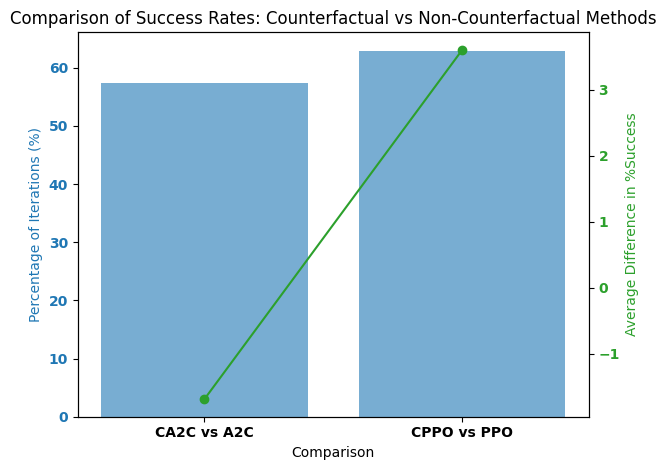

In [49]:
import pandas as pd
import glob
import numpy as np

# Define the file patterns for the counterfactual and non-counterfactual methods
file_patterns = {
    'CA2C': './csvLogs/CA2C_0.5_0.5_2_seed*.csv',
    'CPPO': './csvLogs/CPPO_0.5_0.5_2_seed*.csv',
    'A2C': './csvLogs/A2Cuser2_seed*.csv',
    'PPO': './csvLogs/PPOuser2_seed*.csv',
    'DQN': './csvLogs/DQNuser2_seed*.csv',
}

# Load the data
data = {}
for label, pattern in file_patterns.items():
    files = glob.glob(pattern)
    df_list = [pd.read_csv(file) for file in files]
    data[label] = pd.concat(df_list, ignore_index=True)

# Ensure that the DataFrames have the same number of episodes
min_episodes = min(len(data['CA2C']), len(data['A2C']), len(data['CPPO']), len(data['PPO']))
for key in data:
    data[key] = data[key].iloc[:min_episodes]

# Compute the number of iterations and average difference where CA2C > A2C and CPPO > PPO
ca2c_higher_a2c = (data['CA2C']['%Success'] > data['A2C']['%Success']).sum()
cppo_higher_ppo = (data['CPPO']['%Success'] > data['PPO']['%Success']).sum()
ca2c_higher_a2c = (data['CA2C']['%Success'] > data['A2C']['%Success']).sum()

ca2c_lower_a2c = (data['CA2C']['%Violated'] > data['A2C']['%Violated']).sum()
cppo_lower_ppo = (data['CPPO']['%Violated'] > data['PPO']['%Violated']).sum()
ca2c_lower_a2c = (data['CA2C']['%Violated'] > data['A2C']['%Violated']).sum()



total_iterations = min_episodes
ca2c_percentage = (ca2c_higher_a2c / total_iterations) * 100
cppo_percentage = (cppo_higher_ppo / total_iterations) * 100
ca2c_lower_perc = (ca2c_lower_a2c/total_iterations)*100
cppo_lower_perc = (cppo_lower_ppo/total_iterations)*100



ca2c_avg_diff = ((data['CA2C']['%Success'][0:100] - data['A2C']['%Success'][0:100]).mean())*100
cppo_avg_diff = ((data['CPPO']['%Success'][0:100] - data['PPO']['%Success'][0:100]).mean())*100

ca2c_avg_time = data['CA2C']['Time'].mean()
a2c_avg_time = data['A2C']['Time'].mean() 
cppo_avg_time = data['CPPO']['Time'].mean() 
ppo_avg_time = data['PPO']['Time'].mean() 
dqn_avg_time = data['DQN']['Time'].mean() 
print(f"Average time taken per episode for CA2C: {ca2c_avg_time:.2f} seconds")
print(f"Average time taken per episode for A2C: {a2c_avg_time:.2f} seconds")
print(f"Average time taken per episode for CPPO: {cppo_avg_time:.2f} seconds")
print(f"Average time taken per episode for PPO: {ppo_avg_time:.2f} seconds")
print(f"Average time taken per episode for DQN: {dqn_avg_time:.2f} seconds")

# Print the results
print(f"Number of iterations where CA2C > A2C: {ca2c_higher_a2c} out of {total_iterations}")
print(f"Percentage of iterations where CA2C > A2C: {ca2c_percentage:.2f}%")
print(f"Average difference in %Success (CA2C - A2C): {ca2c_avg_diff:.2f}")

print(f"Number of iterations where CPPO > PPO: {cppo_higher_ppo} out of {total_iterations}")
print(f"Percentage of iterations where CPPO > PPO: {cppo_percentage:.2f}%")
print(f"Average difference in %Success (CPPO - PPO): {cppo_avg_diff:.2f}")
print(f"Percentage of iterations where CA2C < A2C: {ca2c_lower_perc:.2f}%")
print(f"Percentage of iterations where CPPO < PPO: {cppo_lower_perc:.2f}%")

# Plot the results
labels = ['CA2C vs A2C', 'CPPO vs PPO']
percentages = [ca2c_percentage, cppo_percentage]
avg_diffs = [ca2c_avg_diff, cppo_avg_diff]

fig, ax1 = plt.subplots()

# Plot percentage of iterations
color = 'tab:blue'
ax1.set_xlabel('Comparison')
ax1.set_ylabel('Percentage of Iterations (%)', color=color)
ax1.bar(labels, percentages, color=color, alpha=0.6, label='Percentage of Iterations')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for average differences
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Difference in %Success', color=color)
ax2.plot(labels, avg_diffs, color=color, marker='o', label='Average Difference')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Comparison of Success Rates: Counterfactual vs Non-Counterfactual Methods')

# Show the plot
fig.tight_layout()
plt.show()

In [43]:
data['CA2C']['Time']

0       1.017120
1       0.886028
2       0.927941
3       0.728473
4       0.760842
          ...   
1995    1.021701
1996    0.838098
1997    0.948694
1998    1.025205
1999    0.975987
Name: Time, Length: 2000, dtype: float64